# Data Analysis on Propser Loan Dataset
## by Aisha Awudu

## Introduction
The objective of the project is to use Python visualization libraries to explore a dataset thoroughly. The analysis begins with exploring univariate variables followed by bivariate and multivariate analysis. This analysis is followed by a short presentation to convey and highlight important findings using explanatory data analysis. A slide deck is prepared with explanatory visuals that follows the major path of exploration and a story is conveyed for better understanding. 




## Preliminary Wrangling


In [44]:
#import all packages to be used in project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import matplotlib.patches as mpatches
import seaborn as sb
import numpy as np
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#### Gathering Data: Source of data from link provided by Udacity 
#### Loading the ProsperLoan dataset into a dataframe


In [45]:
#Load downloaded dataset from Udacity provided link.
#Read CSV file via pandas into a dataframe df_ploan.

df_ploan = pd.read_csv('prosperLoanData.csv') 

#### Assess Data: Assessing data visually and programatically

##### Visual Assessment

In [46]:
#Get visual overview of dataset
df_ploan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


- Data loaded successfully with 81 columns or variables.

In [47]:
#Get structure of dataset
df_ploan.shape

(113937, 81)

- The dataset, has 113937 rows or entries and 81 columns. 

##### Programatic Assessment

In [48]:
#Explore descriptive statistics
df_ploan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [49]:
#Explore descriptive statistics
df_ploan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


- 61 columns are of numerical data type. As such statistics such as mean, standard deviation, and inter quartile ranges were performed in the summary statistics.

In [50]:
#Find missing values
df_ploan.isnull()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


- There are a lot missing entries, as part of the dataset columns certain missing entries for example, OnTimeProsperPayments is the number of on time payments the borrower had made on Prosper loans at the time they created this listing. This value will be null if the borrower has no prior loans.

### What is the structure of your dataset?

The dataset has are 113,937 loans entries with 81 variables.  The variables are numeric and categorical in nature where 61 variables are of numeric type and the remaing of string or object type.

For this project two main categories will be considered from the variables:

1. The demorgraphic information (The basic borrower information)
2. The loan performance indicators (Loan performance variables)

### What is/are the main feature(s) of interest in your dataset?

As a prospective partner I will like to know:
1. What are the base type of borrowers?
2. What is the cuurent state of loans, are there more default loans? 
3. What is the relationship between the Borrower Rate on loans and employment status?
4. What is the relationship between EmploymentStatus vs BorrowerRate in each LoanStatus?



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The dataset has a lot of features to explore. But for the purposes of this project we will focus on an few features to handle our problem statment.

__The demorgrphic information will consider:__

1. __IncomeRange__ - The income range of the borrower at the time the listing was created.
2. __EmploymentStatus__ - The employment status of the borrower at the time they posted the listing.
3. __ListingCategory__ - The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 – Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 – Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 -Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
5. __IsBorrowerHomeowner__ - A Borrower will be classified as a homeowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

__The general performance of loans can be determined by the following indicators:__ 

1. __LoanStatus__ - The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
2. __EstimatedReturn__ - The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.  This is on an annual percentage rate (APR).
3. __ProsperScore__ - A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009.
4. __Term__ - The length of the loan expressed in months.
5. __BorrowerRate__ - The Borrower's interest rate for this loan.

In [51]:

df_new = df_ploan.loc[:, ['LoanOriginationDate','IncomeRange','EmploymentStatus','ListingCategory (numeric)','IsBorrowerHomeowner','LoanStatus','EstimatedReturn','ProsperScore','Term', 'BorrowerRate']]


In [52]:
df_new.head()

,LoanOriginationDate,IncomeRange,EmploymentStatus,ListingCategory (numeric),IsBorrowerHomeowner,LoanStatus,EstimatedReturn,ProsperScore,Term,BorrowerRate
0,2007-09-12 00:00:00,"$25,000-49,999",Self-employed,0,True,Completed,NaN,NaN,36,0.1580
1,2014-03-03 00:00:00,"$50,000-74,999",Employed,2,False,Current,0.05470,7.0,36,0.0920
2,2007-01-17 00:00:00,Not displayed,Not available,0,False,Completed,NaN,NaN,36,0.2750
3,2012-11-01 00:00:00,"$25,000-49,999",Employed,16,True,Current,0.06000,9.0,36,0.0974
4,2013-09-20 00:00:00,"$100,000+",Employed,2,True,Current,0.09066,4.0,36,0.2085


## Univariate Exploration

> This section explores data using univariate methods for our two categories to get a better idea of the variable distribution. 



In [53]:
#function created to avoid code repetition 
def lchart_labels(x_label,y_label,title):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)


### Plot I to V below gives answers to What are the base type of borrowers?

### <font color='green'> PLOT I 

### Income Range
For our variables of interest we start be looking at our demographic features commencing with income range of borrowers.

In [54]:
df_new.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

- From the result we have to rename some of the entries as they are similar in meaning to get a better picture of the data.

In [55]:
df_new['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)

In [56]:
#Check to confirm changes made are effected
df_new['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
$0                 9168
$1-24,999          7274
Name: IncomeRange, dtype: int64

In [57]:
# put the income range in an ordinal category
ord_income = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']
ordered_income_var = pd.api.types.CategoricalDtype(ordered = True, categories = ord_income)
df_new['IncomeRange'] = df_new['IncomeRange'].astype(ordered_income_var)

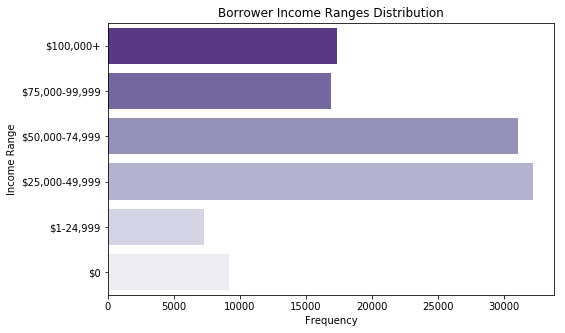

In [58]:
# A bar chart to display distribution 
plt.figure(figsize = [8, 5])
income_plot = sb.countplot(data = df_new, y = 'IncomeRange', palette = "Purples_r")
lchart_labels('Frequency','Income Range','Borrower Income Ranges Distribution');



- From the bar chart above, majority of borrowers have an income range of  \\$25k-49k followed by an income range of  \\$50k-74k. The minimum number of borrowers fall within \\$1-24k income range.

### <font color='green'> PLOT II

### Employment Status


In [59]:
df_new.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [60]:
#Replace entries with similar categorizations 
emply_stat = df_new['EmploymentStatus'].replace(['Full-time', 'Self-employed','Part-time'], 'Employed', inplace = True)


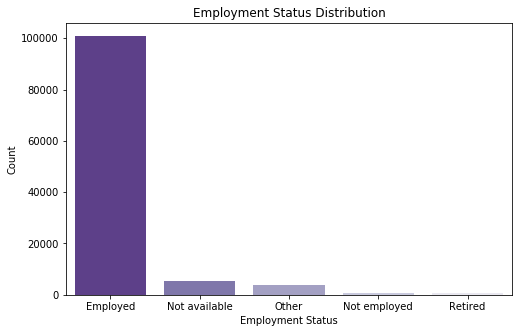

In [61]:
# A bar chart to display employment status distribution 
plt.figure(figsize = [8, 5])
emp_plot = sb.countplot(data = df_new, x = 'EmploymentStatus', palette = "Purples_r")
lchart_labels('Employment Status','Count','Employment Status Distribution');


- From the bar chart above over 100,000 borrowers are employed. These are made up of fully employed, self-employed and partially employed borrowers. 795 borrowers are retired representing the shortest bar.

### <font color='green'> PLOT III

### Listing Category

In [62]:
df_new['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

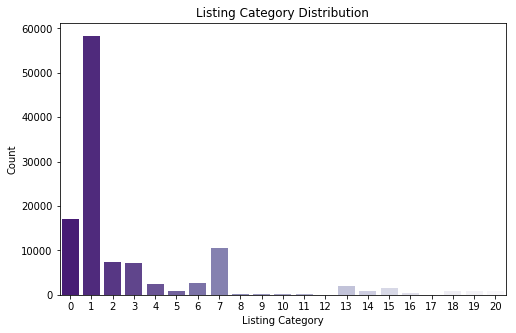

In [63]:
# A bar chart to display listing categories distribution 
plt.figure(figsize = [8, 5])
emp_plot = sb.countplot(data = df_new, x = 'ListingCategory (numeric)', palette = "Purples_r")
lchart_labels('Listing Category','Count','Listing Category Distribution');


- From the bar chart above, 58308 being the highest of loans are taken for the purposes of Debt Consolidation indicated by 1.

### <font color='green'> PLOT IV

### Home Owners

In [64]:
df_new['IsBorrowerHomeowner'].value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

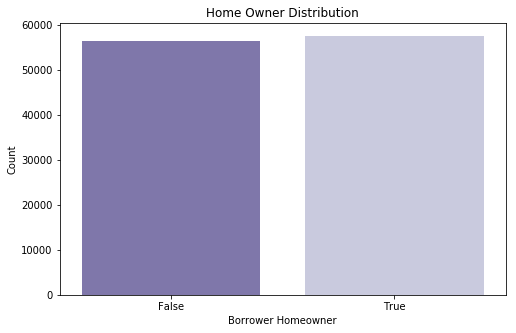

In [65]:
# A bar chart to display borrowers who are home owners distribution 
plt.figure(figsize = [8, 5])
emp_plot = sb.countplot(data = df_new, x = 'IsBorrowerHomeowner', palette = "Purples_r")
lchart_labels('Borrower Homeowner','Count','Home Owner Distribution');

- The bar chart above indicates the borrowers who are home owners are 1,019, more than those who are not home owners.

### Plot V attends to the question What is the cuurent state of loans, are there more default loans? 

### <font color='green'> PLOT V

### Loan Status

In [66]:
df_new['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

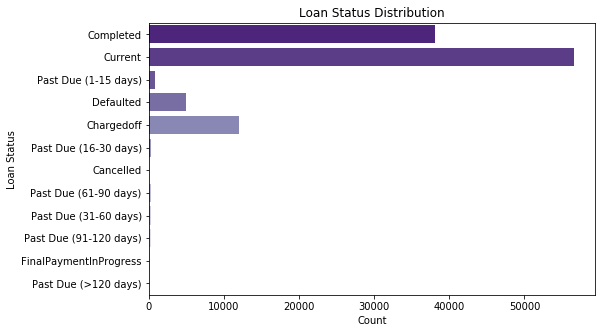

In [67]:
# A bar chart to display borrowers loan status
plt.figure(figsize = [8, 5])
emp_plot = sb.countplot(data = df_new, y = 'LoanStatus', palette = "Purples_r")
lchart_labels('Count','Loan Status','Loan Status Distribution');

- From the above chart 56,576 being the highest represents current loans, whereas, 38,074 of the loans have been completed. There is a record of 5,018 defaulted loans. 

### <font color='green'> PLOT VI

### Estimated Return

In [68]:
df_new['EstimatedReturn'].describe()

count    84853.000000
mean         0.096068
std          0.030403
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64

- The output of the description could be distorted because of the null values. To avert this we have to remove missing value entries.

In [69]:
# drop missing entries in estimated return
df_new.EstimatedReturn.dropna(axis = 0, inplace = True)

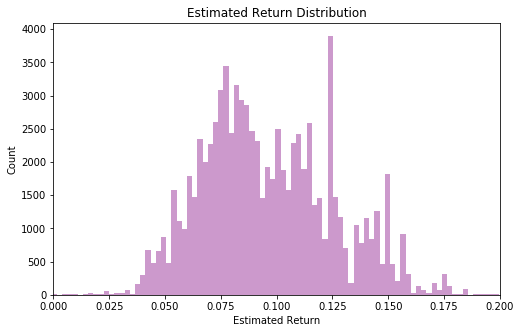

In [70]:
# histogram plot
plt.figure(figsize = [8,5])
sb.distplot(df_new.EstimatedReturn, kde = False, bins = 200, color = "Purple")
plt.xlim(0, .2)
lchart_labels('Estimated Return','Count','Estimated Return Distribution');
plt.show()

- The estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. From the histogram, it looks left skewed with a mean of 0.09 and a standard deviation of 0.03. 

### <font color='green'> PLOT VII

### Prosper Score

> Prosper Score: A custom risk score built using historic Prosper data. The score ranges from 1-11, with 11 being the best, or lowest risk score. [Prosper website:](https://help.prosper.com/hc/en-us/articles/210013633-Where-can-I-view-my-Notes-and-their-payment-histories-): 


In [71]:
df_new['ProsperScore'].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

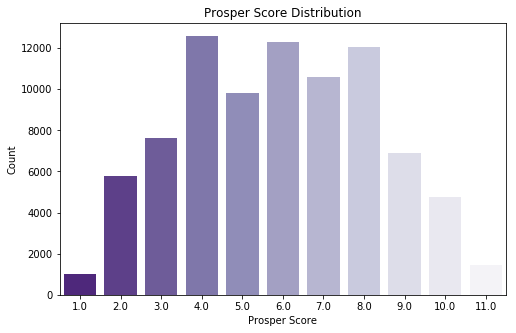

In [72]:
# A bar chart to display Prosper Score
plt.figure(figsize = [8, 5])
emp_plot = sb.countplot(data = df_new, x = 'ProsperScore', palette = "Purples_r")
lchart_labels('Prosper Score','Count','Prosper Score Distribution');

- The highest-rated loan score is 4 with 12595, which has a high risk according to the prosper scare rating. The best rating of 11 has a frequency of 1456, which is the second least on the bar chart. The appearance of the chart almost seems bell shaped which is similar to a normal distribution. 

### <font color='green'> PLOT VIII

### Loan Term

In [73]:
df_new['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

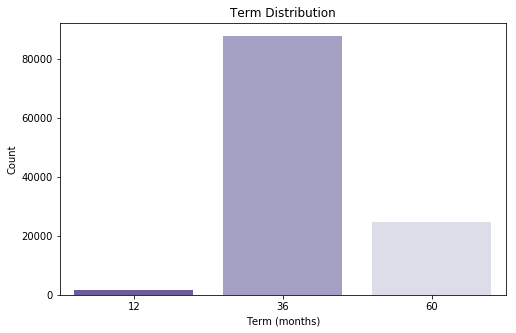

In [74]:
# A bar chart to display Term of various loans
plt.figure(figsize = [8, 5])
sb.countplot(data = df_new, x = 'Term', palette = "Purples_r")
lchart_labels('Term (months)','Count','Term Distribution');

- The highest Term is 36 months with 87,778 loans associated, followed by 60 months with 24,545 loans. 

### <font color='green'> PLOT IX

### Loan Borrower Rate

In [75]:
df_new['BorrowerRate'].value_counts()

0.3177    3672
0.3500    1905
0.3199    1651
0.2900    1508
0.2699    1319
0.1500    1182
0.1400    1035
0.1099     949
0.2000     907
0.1585     806
0.1800     800
0.1299     782
0.2099     776
0.2599     761
0.2199     739
0.1620     733
0.3134     726
0.1899     713
0.1550     713
0.1840     669
0.1449     629
0.1700     621
0.2085     613
0.2049     610
0.0990     610
0.1249     596
0.2500     578
0.2400     575
0.0974     566
0.1189     565
          ... 
0.0658       1
0.3153       1
0.1666       1
0.3433       1
0.1873       1
0.3360       1
0.0742       1
0.0868       1
0.0846       1
0.2777       1
0.3106       1
0.0832       1
0.0797       1
0.1432       1
0.2216       1
0.2252       1
0.2431       1
0.1822       1
0.3071       1
0.0614       1
0.3478       1
0.0638       1
0.0827       1
0.1367       1
0.2881       1
0.2717       1
0.1732       1
0.1704       1
0.1786       1
0.1721       1
Name: BorrowerRate, Length: 2294, dtype: int64

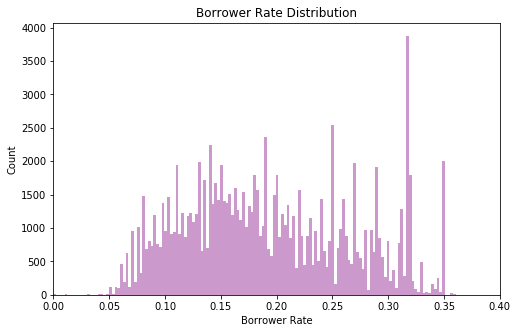

In [76]:
#Borrower Rate Distribution 

plt.figure(figsize = [8,5])
sb.distplot(df_new.BorrowerRate, kde = False, bins = 200, color = "Purple")
plt.xlim(0, .4)
lchart_labels('Borrower Rate','Count','Borrower Rate Distribution');
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


>For our variables of interest we started by looking at our demographic features commencing with income range of borrowers we had to rename some of the entries as they are similar in meaning to get a better picture of the data.
Majority of borrowers have an income range of \\$25k-49k followed by an income range of  \\$50k-74k. The minimum number of borrowers fall within \\$1-24k income range. For employment status over 100,000 borrowers are employed. These are made up of fully employed, self-employed and partially employed borrowers. 795 borrowers are retired representing the shortest bar. About 58,308 being the highest of loans are taken for the purposes of Debt Consolidation indicated by 1.
There are 1,019 more borrowers who are home owners, than those who are not home owners. This means majority have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

>For the current loan distribution as of the time dataset was downlaoeded 56,576 was the highest representing current loans, whereas, 38,074 of the loans have been completed. There is a record of 5,018 defaulted loans. 
The estimated return description result indicated missing values could distort our exploration. To avert this we removed missing value entries.

>The estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. From the histogram, it looks left skewed with a mean of 0.09 and a standard deviation of 0.03. 
The highest-rated loan score is 4 with 12595, which has a high risk according to the prosper scare rating. The best rating of 11 has a frequency of 1456, which is the second least on the bar chart.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>The data in mostly had missing data which where justified for certain variables. For variables such as the esitmated return missing values had to be dropped as it distorted the statistics operated on the variable.

## Bivariate Exploration

> In this section, we investigate relationships between pairs of variables in the
data. As varibles are of quantitative and qualitative types we will use a couple of methods that are best suited. 

In [77]:
# numeric and categorical variables
num_variables = ['EstimatedReturn', 'Term', 'BorrowerRate', 'ProsperScore']
cat_variables = ['IncomeRange', 'LoanStatus', 'IsBorrowerHomeowner', 'ListingCategory (numeric)', 'EmploymentStatus']

### <font color='green'> PLOT I

### Correlation matrix for all numeric variables under consideration

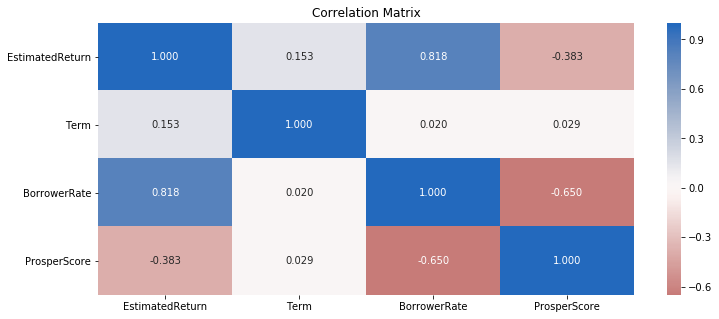

In [78]:
# Correlation matrix for all numeric variables
plt.figure(figsize = [12, 5])
sb.heatmap(df_new[num_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix') 
plt.show()

- ProsperScore is negatively related to EstimatedReturn and BorrowerRate but positively related to loan Term.
- BorrowerRate is positively related to EstimatedReturn and loan Term but negatively related to ProsperScore.

### <font color='green'> PLOT II

### Clustered bar chart to find distribution between Income Range and Prosper Score

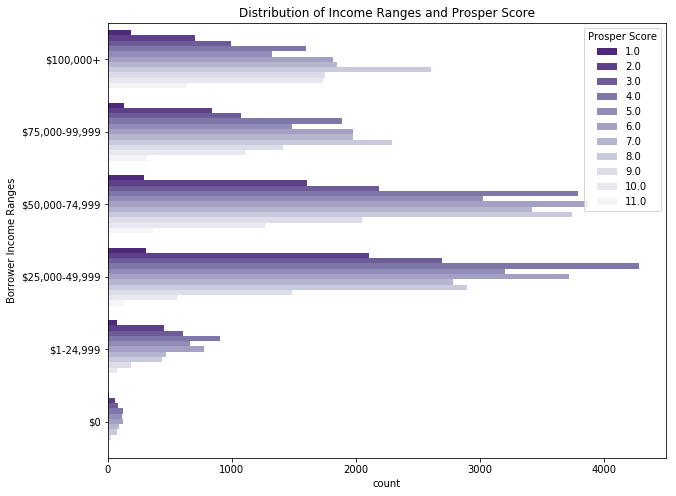

In [79]:
# clustered bar chart
plt.figure(figsize = [10,8])

ax = sb.countplot(data = df_new, y = 'IncomeRange', hue = 'ProsperScore',
                   palette = 'Purples_r')

ax.legend(title = 'Prosper Score')
plt.title('Distribution of Income Ranges and Prosper Score')
plt.ylabel('Borrower Income Ranges');

- The ProsperScore of 4 is the highest score which falls within the salary range of \\$25k-49k of borrowers.
- For the salary range of \\$50k-74k we realize the highest ProsperScore is 6 which has a better risk level than 4.

### <font color='green'> PLOT III

### Multiplot for Loan Status variables against Borrower Rate

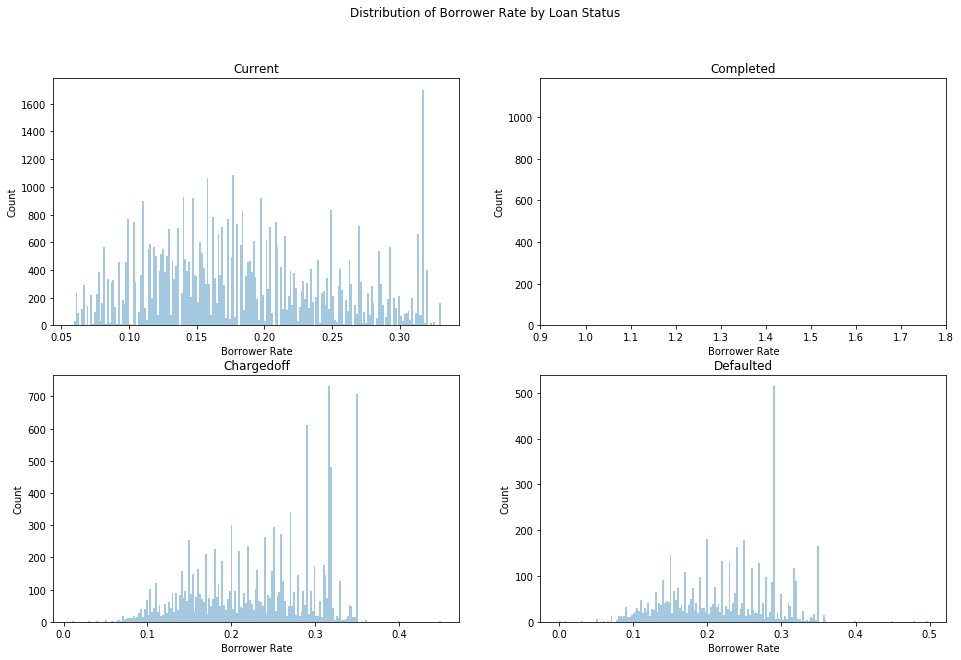

In [80]:
# multiplot for loan status

variables = ['Current', 'Completed', 'Chargedoff', 'Defaulted']

plt.figure(figsize = [16, 10])

# loop through variables list
for i in range(len(variables)):
    plt.subplot(2, 2, i+1)
    
    sb.distplot(df_new.query('LoanStatus == "{}"'.format(variables[i])).BorrowerRate, 
                 kde = False, bins = 200)
    
    plt.xlabel('Borrower Rate')
    plt.ylabel('Count')
    plt.title(variables[i])
    
plt.subplot(2, 2, 2)
plt.xlim(.9, 1.8)

plt.suptitle('Distribution of Borrower Rate by Loan Status');

- Current loans have interest rates ranging from 10% to 35%
- Similar can be said of chargedoff loans
- The highest interest rate on borrowing for default loans fell between 20% to 30%

### Findings for What is the relationship between the Borrower Rate on loans and employment status?

### <font color='green'> PLOT IV

### Multiplot for employment Status variables against Borrower Rate

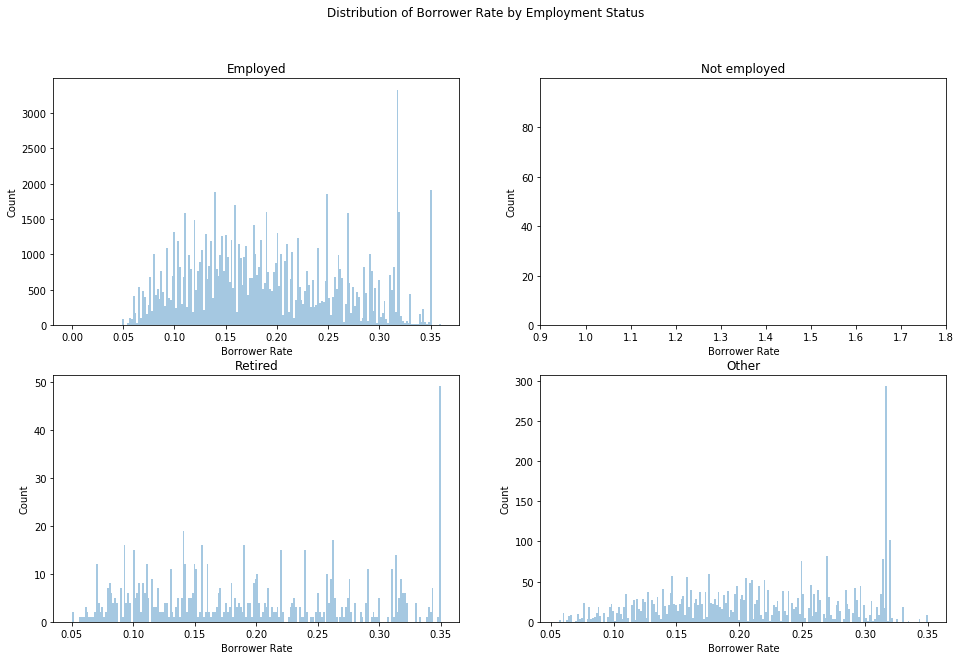

In [81]:
# multiplot for loan status

variables = ['Employed', 'Not employed', 'Retired', 'Other']

plt.figure(figsize = [16, 10])

# loop through variables list
for i in range(len(variables)):
    plt.subplot(2, 2, i+1)
    
    sb.distplot(df_new.query('EmploymentStatus == "{}"'.format(variables[i])).BorrowerRate, 
                 kde = False, bins = 200)
    
    plt.xlabel('Borrower Rate')
    plt.ylabel('Count')
    plt.title(variables[i])
    
plt.subplot(2, 2, 2)
plt.xlim(.9, 1.8)

plt.suptitle('Distribution of Borrower Rate by Employment Status');

- Employed borrowers have a highest rate range between 30-35%
- Retired borrowers have a highest borrower rate of 35%

### <font color='green'> PLOT V

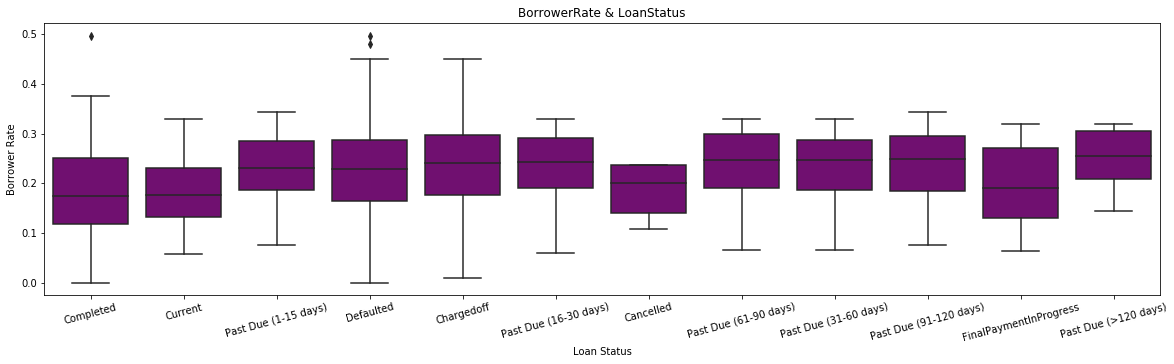

In [82]:
# Borrower APR vs Status of Loan 
plt.figure(figsize = [20, 5])
sb.boxplot(data=df_new,y='BorrowerRate',x='LoanStatus',color='purple');
plt.title('BorrowerRate & LoanStatus');
plt.ylabel('Borrower Rate');
plt.xlabel('Loan Status');
plt.xticks(rotation=15);

- From the chart, completed and current loan statuses have the lowest borrower rates.
- It is observed, loans that are past due have higher borrower rates.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> ProsperScore is moderately negatively related to EstimatedReturn and BorrowerRate but positively related to loan Term.
BorrowerRate is strongly positively related to EstimatedReturn and loan Term but negatively related to ProsperScore. The ProsperScore of 4 is the highest score which falls within the salary range of \\$25k-49k of borrowers. For the salary range of \\$50k-74k we realize the highest ProsperScore is 6 which has a better risk level than 4. Current loans have interest rates ranging from 10% to 35% as well as chargeoff. The highest interest rate on borrowing for default loans fell between 20% to 30%.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Employed borrowers have a highest rate range between 30-35% and retired borrowers have a highest borrower rate of 35%.

## Multivariate Exploration

> In this sectiion we create plots of three or more variables to investigate our data even
further. Here we derive insights from previous explorations of selected variables. 

### <font color='green'> PLOT I

#### EmploymentStatus vs BorrowerRate in each LoanStatus


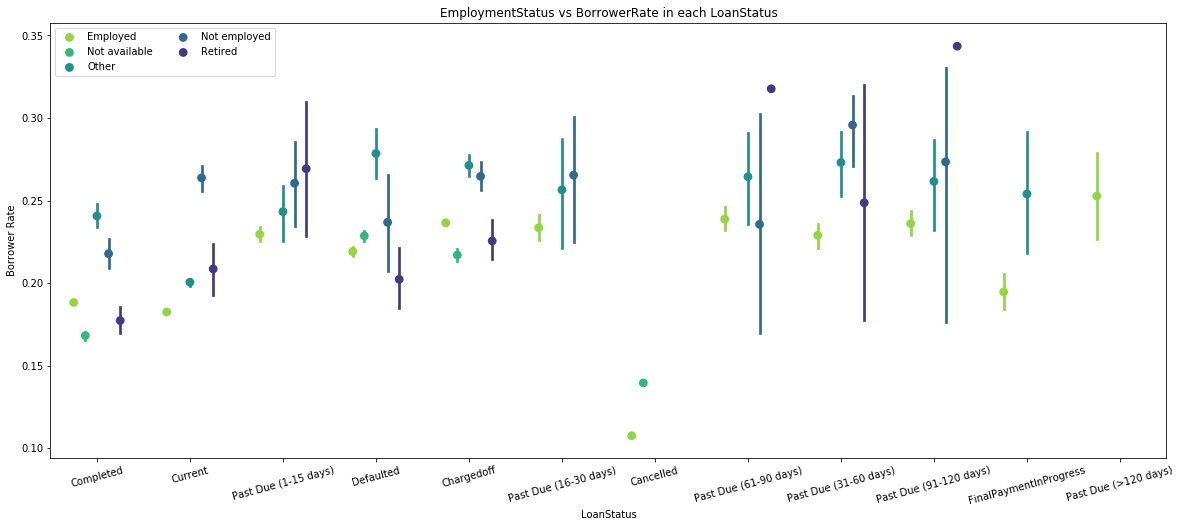

In [83]:
# EmploymentStatus vs BorrowerRate in each LoanStatus
fig = plt.figure(figsize = [20,8])
ax = sb.pointplot(data = df_new, x = 'LoanStatus', y = 'BorrowerRate', hue = 'EmploymentStatus', linestyles = "",
                  dodge = 0.5, palette = 'viridis_r')
plt.title('EmploymentStatus vs BorrowerRate in each LoanStatus')
plt.ylabel('Borrower Rate')
plt.xticks(rotation=15)
plt.legend(ncol=2)
plt.show();

- Retired and not employed have the highest borrower rate especially with past due loans.

### <font color='green'> PLOT II

### LoanStatus Vs BorrowerRate in each IncomeRange


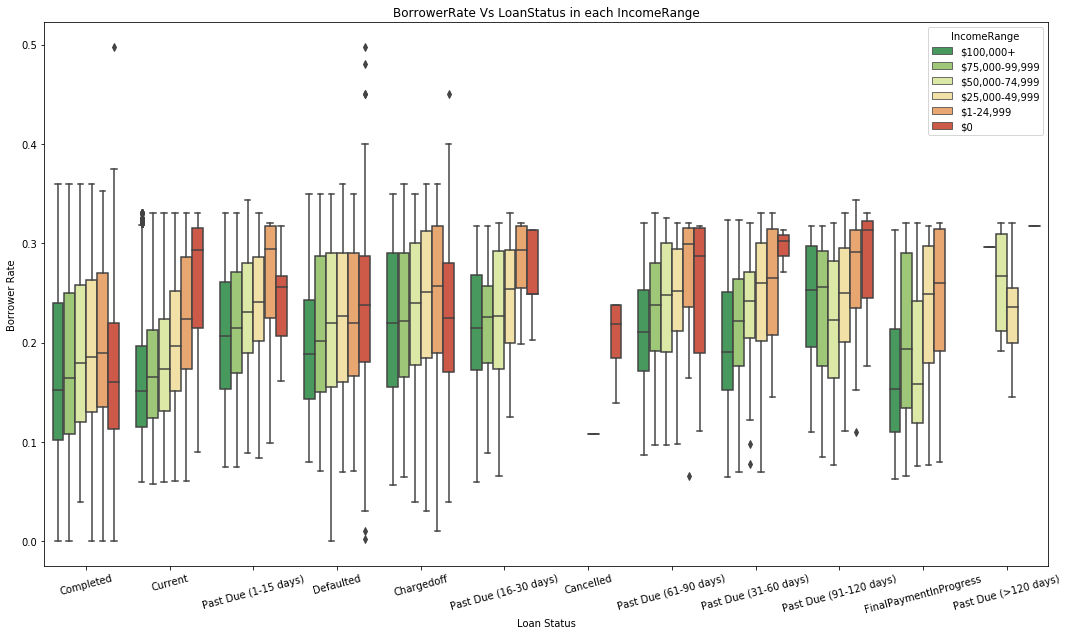

In [84]:
# LoanStatus Vs BorrowerRate in each EmploymentStatus
plt.figure(figsize=[18,10])
sb.boxplot(x="LoanStatus", y="BorrowerRate", hue="IncomeRange", data=df_new, palette="RdYlGn_r");
plt.title('BorrowerRate Vs LoanStatus in each IncomeRange');
plt.xlabel('Loan Status');
plt.ylabel('Borrower Rate');
plt.xticks(rotation = 15);

- Past due loan statuses have higher borrower rates for borrower's with no income or \\$0 and \\$1-25k income range.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Retired and not employed employment statuses have the highest borrower rate especially with past due loans. Past due loan statuses have higher borrower rates for borrower's with no income or \\$0 and \\$1-25k income range. We can induce, borrowers who are retired and not employed with with \\$0-25k income range may not perform well on loans taken.

### Were there any interesting or surprising interactions between features?

> There are a few  outliers in chargeoff, defaulted loan, and  pastDue(31-60 days) status.

## Conclusions
> From our exploration ProsperScore is moderately negatively related to EstimatedReturn and BorrowerRate but positively related to loan Term. This means as ProsperScore increases EstimatedReturn and BorrowerRate decreases and vice versa. Further, it was realized BorrowerRate is strongly positively related to EstimatedReturn and loan Term but negatively related to ProsperScore. This means a unit increase in BorrowerRate will lead to an increase in EstimatedReturn and loan Term. We can therefore say, longer loan terms have higher BorrowerRates.

> Our exploration also brought to the fore, the fact that most loans taken from Prosper Loan are for the purposes of Debt Consolidation. Also, default loans were mainly by borrowers whose employment status was not employed and retired with incomerange or \\$0 and \\$1-25k. The highest-rated loan score is 4 with 12595, which has a high risk according to the prosper scare rating. The best rating of 11 has a frequency of 1456, which is the second least on the bar chart. 
